# Comparing interval estimation on a textbook dataset of a dune meadow community

This dataset presented in a classical [ecology textbook](https://doi.org/10.1017/CBO9780511525575) contains the abundances of 30 plant species at 20 different sampling sites on the Dutch island of Terschelling.

Here we use this dataset (Table 0.1 in the book) to compare the interval estimates provided by Chao's method and our unbiased estimator.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pydiver
plt.style.use('estimator.mplstyle')

In [2]:
df = pd.read_csv('data/dune.csv', index_col=0).T

In [3]:
df.sum(axis=0).min(), df.sum(axis=0).max()

(15, 48)

In [4]:
pcs = pd.DataFrame(dict(pc=df.apply(pydiver.pc),
                        varpc=df.apply(lambda x: pydiver.varpc(x, method='unbiased', poisson_bound=True)),
                        varpc_chao=df.apply(lambda x: pydiver.varpc(x, method='chao'))))

Text(0.5, 0, 'Site')

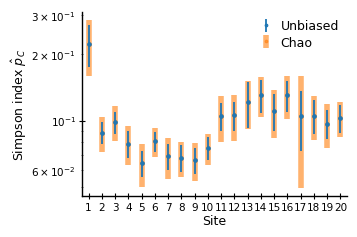

In [5]:
plt.errorbar(pcs.index, pcs['pc'], pcs['varpc']**.5, fmt='o', c='C0', label='Unbiased', zorder=1)
plt.errorbar(pcs.index, pcs['pc'], pcs['varpc_chao']**.5, fmt='o', alpha=.6, c='C1', lw=4, label='Chao', zorder=0)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(1, 21));
plt.xlim(0.5, 20.5)
plt.ylabel('Simpson index $\hat p_C$')
plt.xlabel('Site')

Interval estimates for the biodiversity at each site were obtained from the unbiased estimator (blue) and the Chao estimator (orange) as $\hat{p_C} \pm \sqrt{\hat{Var}_{\mathrm{method}}(\hat{p_C})}$. The unbiased estimator yields systematically smaller error bars in line with the upwards bias of Chao's observed in simulated data. As a consequence, more of the error bars overlap which we quantify in the following:

In [6]:
score = []
for i in range(pcs.shape[0]):
    for j in range(i+1, pcs.shape[0]):
        z = np.abs(pcs['pc'].iloc[i] - pcs['pc'].iloc[j]) / (pcs['varpc'].iloc[i]**.5  + pcs['varpc'].iloc[j]**.5)
        score.append(z)
score = np.array(score)

In [7]:
(score>1).sum()/len(score)

0.4421052631578947

In [8]:
score_chao = []
for i in range(pcs.shape[0]):
    for j in range(i+1, pcs.shape[0]):
        z = np.abs(pcs['pc'].iloc[i] - pcs['pc'].iloc[j]) / (pcs['varpc_chao'].iloc[i]**.5  + pcs['varpc_chao'].iloc[j]**.5)
        score_chao.append(z)
score_chao = np.array(score_chao)

In [9]:
(score_chao>1).sum()/len(score_chao)

0.2894736842105263